<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

In [3]:
from queue import Queue
def cycles(G):
    
    TF = False
    
    for nodo in G.nodes:
        origen = nodo
    visited, queue = set(), Queue()
    queue.put(origen)
    
    parent = {origen:None}
    
    while not queue.empty() and TF == False:
        node = queue.get()
        if node in visited:
            TF = True
        if node not in visited:
            visited.add(node)
            for nb in G.neighbors(node):
                if nb in visited:
                    if parent [node]!= nb:
                        TF = True
                    continue
                queue.put(nb)
                parent[nb] = node
                
    return TF

In [4]:
import networkx as nx
G = nx.generators.barabasi_albert_graph(100, 2)
cycles(G)

True

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

In [3]:
def dfs(G, origen):   
    visited = set()
    stack = []
    stack.append(origen)
    parent = {origen:None}
    
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            for n in G.neighbors(node):
                if n in visited:
                    continue
                stack.append(n)
                
    return len(visited)

In [4]:
def isPosible (G, origen, destino):
    if len(list(G.neighbors(origen))) == 1:
        return True
    
    else:
        num_nodes_with_edge = dfs(G, origen)
        
        G.remove_edge(origen, destino)
        num_nodes_without_edge = dfs(G, origen)
        
        G.add_edge(origen, destino)
        
        if num_nodes_with_edge > num_nodes_without_edge:
            return False
        else:
            return True

In [5]:
import random

def euler(G):
    # Primero observaremos si el grafo G puede ser estudiado como circuito euleriano o no, 
    # es decir, si todos y cada uno de los nodos tienen un número par de aristas
    
    hay_circuito = True
    for node in G.nodes:
        if len(list(G.neighbors(node)))%2 != 0:
            hay_circuito = False      

    # En caso de haber circuito...
    if (hay_circuito):
        
        # Creamos la variable que vamos a retornar
        nodelist = []
        
        # y escogemos un nodo aleatorio del grafo, que será nuestro nodo de salida y llegada
        nodelist.append(random.choice(list(G.nodes)))
        
        # Mientras queden aristas en el grafo...
        while list(G.edges):
            
            # cogemos el último nodo de la nodelist
            node = nodelist[-1]
            found = False
            
            # y miramos sus vecinos
            for nb in G.neighbors(node):
                
                # Mientras sea posible ir desde el nodo actual a su vecino (hay una arista no transitada),
                # añadiremos el nodo vecino a nodelist y eliminaremos esa arista ya que solo podemos
                # recorrerla una vez en todo el circuito
                
                if (isPosible(G, node, nb)):
                    nodelist.append(nb)
                    G.remove_edge(node,nb)
                    break      
            
        return nodelist   
    
    else:
        return("No hay circuito.")

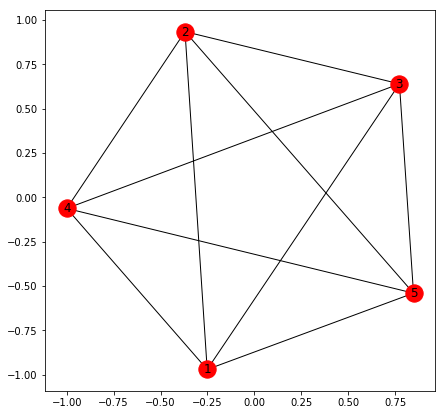

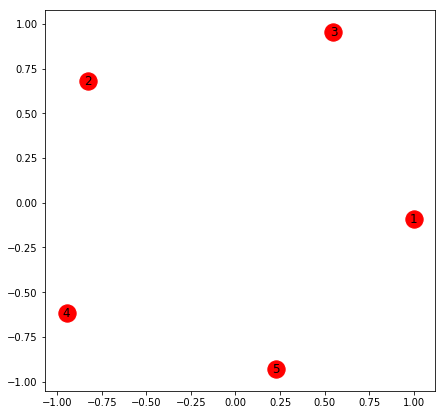

In [6]:
# EJEMPLO 1
import networkx as nx
from utils import draw
graph = nx.Graph()
graph.add_edges_from(((1,2),(1,3),(1,4),(1,5),
                  (2,3),(2,4),(2,5),
                  (3,4),(3,5),
                  (4,5)))
draw(graph)
euler(graph)
draw(graph)

'No hay circuito.'

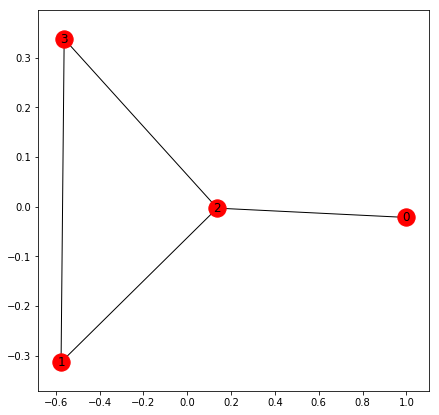

In [21]:
# EJEMPLO 2
import networkx as nx
from utils import draw
G = nx.generators.barabasi_albert_graph(4, 2)
draw(G)
euler(G)

[2, 0, 3, 1, 2]

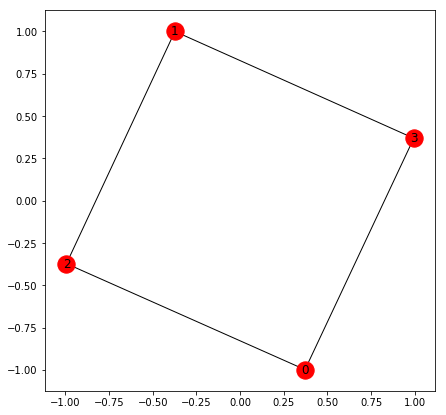

In [24]:
# EJEMPLO 3
import networkx as nx
from utils import draw
G = nx.generators.barabasi_albert_graph(4, 2)
draw(G)
euler(G)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

Se debe cumplir que:
 + El grafo debe ser conexo y no dirigido (se utilizan únicamente estos grafos, en otro caso hay error) 
 + Cada vértice debe tener un grado par (véase EJEMPLO 1)
 + No deben haber vértices aislados o con una única arista (un puente) . (véase EJEMPLO 2)

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>

In [29]:
import random

def euler_path(G):
    # Primero observaremos si el grafo G puede ser estudiado como circuito o camino euleriano, 
    # es decir, si todos hay 2 nodos con grado impar 
    
    hay_circuito = True
    nodes_impares = 0
    
    for node in G.nodes:
        if len(list(G.neighbors(node)))%2 == 1:
            nodes_impares += 1
            node_edges_impar = node
            if nodes_impares > 2:
                hay_circuito = False      
    
    
    # En caso de haber circuito o camino...
    if (hay_circuito):
        
        # Creamos la variable que vamos a retornar
        nodelist = []
        
        # Si tenemos un camino euleriano, nuestro nodo origen será uno de los 2 nodos impares (el otro será el destino),
        # pero si tenemos un circuito hacemos un random.choice oara escoger un nodo aleatorio
        if nodes_impares == 2:
            nodelist.append(node_edges_impar)
        else:
            nodelist.append(random.choice(list(G.nodes)))
        
        # Mientras queden aristas en el grafo...
        while list(G.edges):
            
            # cogemos el último nodo de la nodelist
            node = nodelist[-1]
            found = False
            
            # y miramos sus vecinos
            for nb in G.neighbors(node):
                
                # Mientras sea posible ir desde el nodo actual a su vecino (hay una arista no transitada),
                # añadiremos el nodo vecino a nodelist y eliminaremos esa arista ya que solo podemos
                # recorrerla una vez en todo el circuito o camino
                if (isPosible(G, node, nb)):
                    nodelist.append(nb)
                    G.remove_edge(node,nb)
                    break      
            
        return nodelist   
    
    else:
        return("No hay circuito.")

[2, 0, 3, 2, 1]

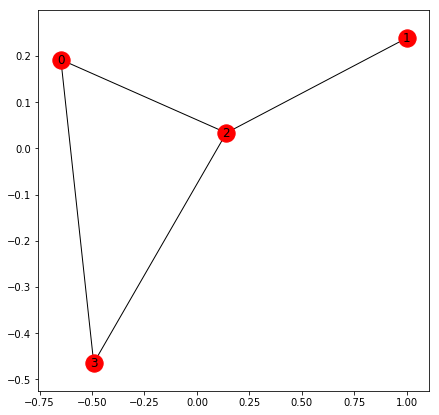

In [31]:
# EJEMPLO 4
import networkx as nx
from utils import draw
G = nx.generators.barabasi_albert_graph(4, 2)
draw(G)
euler_path(G)

[3, 0, 2, 1, 4, 3, 2]

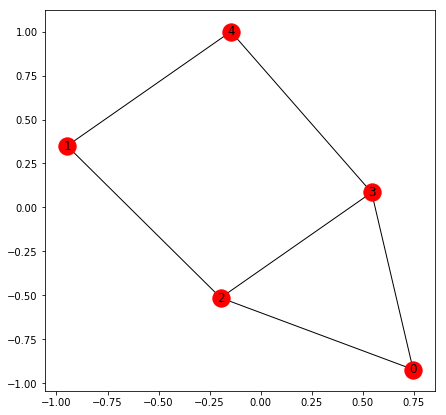

In [43]:
# EJEMPLO 5
import networkx as nx
from utils import draw
G = nx.generators.barabasi_albert_graph(5, 2)
draw(G)
euler_path(G)